## NYC Evictions Sonification: Data to MIDI

#### Set Up

In [1]:
%run functions.py
%run MidiFile.py

In [2]:
import pandas as pd
import matplotlib.pylab as plt

Matplotlib is building the font cache; this may take a moment.


#### Load Data

In [5]:
# [1] Load Data
filename = 'nyc-evictions'
df = pd.read_csv(filename + '.csv')
df['Eviction_Date_Format'] = pd.to_datetime(df['Eviction_Date_Format'])
df['Index'] = range(1, len(df)+1)
print(df.head())

  Eviction_Month_Year Eviction_Date_Format Eviction_Month  Eviction_Year  \
0            Jan 2017           2017-01-01            Jan           2017   
1            Feb 2017           2017-02-01            Feb           2017   
2            Mar 2017           2017-03-01            Mar           2017   
3            Apr 2017           2017-04-01            Apr           2017   
4            May 2017           2017-05-01            May           2017   

   NYC_Evictions  Index  
0           2237      1  
1           1695      2  
2           2040      3  
3           1860      4  
4           2080      5  


#### Plot Data

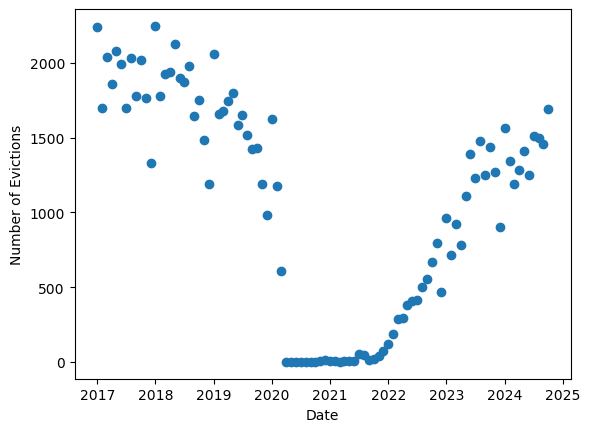

In [6]:
# [2] Plot Data
month = df['Eviction_Date_Format'].values
evictions = df['NYC_Evictions'].values
plt.plot(month, evictions, 'o')
plt.xlabel('Date')
plt.ylabel('Number of Evictions')
plt.show()

#### General Mapping Function

In [7]:
# [3] Write a general mapping function
# Converting original data range to a new range of values
def map_value(value, min_value, max_value, min_result, max_result):
    result = min_result + (value - min_value)/(max_value - min_value)*(max_result - min_result)
    return result
# Test it out
print(map_value(5, 1, 10, 100, 200)) # ~ 144
print(map_value(10, 1, 10, 100, 200)) # 200

144.44444444444446
200.0


#### Compress Time (Duration)

In [10]:
# [4] Compress Time | SET TIME of MIDI
# (option 2 from tutorial): set overall duration
duration_beats = 94 # desired duration in beats, length of data set in this case
instances = df['Index'].values
t_data = map_value(instances, 0, max(instances), 0, duration_beats)
# just mapping 0 to 94 to 0 to 94 which does nothing -- more useful for irregular time markers (depends on your data)
print(t_data)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72.
 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89. 90.
 91. 92. 93. 94.]


#### Normalize and Scale the Data

In [11]:
# [5] Normalize and scale the data (the eviction numbers)
# normalize = map from 0 to 1
y_data = map_value(evictions, min(evictions), max(evictions), 0, 1)
print(y_data)

[9.95992876e-01 7.54674978e-01 9.08281389e-01 8.28138914e-01
 9.26090828e-01 8.87355298e-01 7.55120214e-01 9.05609973e-01
 7.90739092e-01 8.98931434e-01 7.84951024e-01 5.91718611e-01
 1.00000000e+00 7.91629564e-01 8.57969724e-01 8.63757792e-01
 9.47462155e-01 8.43722173e-01 8.33481745e-01 8.81567231e-01
 7.30632235e-01 7.78717720e-01 6.60730187e-01 5.29830810e-01
 9.17186109e-01 7.37756011e-01 7.46215494e-01 7.77382012e-01
 7.99198575e-01 7.04808549e-01 7.35529831e-01 6.74532502e-01
 6.34461264e-01 6.37577916e-01 5.29830810e-01 4.38112199e-01
 7.21727516e-01 5.24042743e-01 2.70258237e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.67141585e-03 4.89759573e-03
 1.78094390e-03 1.33570793e-03 4.45235975e-04 1.33570793e-03
 2.67141585e-03 4.00712378e-03 2.31522707e-02 2.04808549e-02
 4.89759573e-03 8.45948353e-03 1.86999110e-02 3.20569902e-02
 5.25378451e-02 8.37043633e-02 1.28673197e-01 1.30454141e-01
 1.70080142e-01 1.807658

#### Choose Musical Notes and Convert to Numeric MIDI

In [25]:
# [6] Choose musical notes for pitch mapping, convert to MIDI numbers
# MIDI understands notes with MIDI note numbers, e.g. C3 is MIDI note #48
print('Example: The musical note C3 takes on a MIDI value of ', str2midi('C3'), '.', sep="")

# I chose C Aeolian (for somber-ish tone):
note_names = ['C2', 'D2', 'Eb2', 'F2', 'G2', 'Ab2', 'Bb2', 'C3', 'D3', 'Eb3', 'F3', 'G3', 'Ab3', 'Bb3', 
              'C4', 'D4', 'Eb4', 'F4', 'G4', 'Ab4', 'Bb4', 'C5', 'D5', 'Eb5', 'F5', 'G5', 'Ab5', 'Bb5'] # C Aeolian
note_midis = [str2midi(n) for n in note_names]

print('MIDI Values: ', note_midis, sep="")
print('Resolution: ',len(note_midis),' notes', sep="")

Example: The musical note C3 takes on a MIDI value of 48.
MIDI Values: [36, 38, 39, 41, 43, 44, 46, 48, 50, 51, 53, 55, 56, 58, 60, 62, 63, 65, 67, 68, 70, 72, 74, 75, 77, 79, 80, 82]
Resolution: 28 notes


#### Map Data to MIDI

In [29]:
# [7] Map data to MIDI note numbers
# Map y-axis data to MIDI notes and velocity
midi_data = []
vel_data = []
vel_min,vel_max = 20, 127 # choose the velocity range you want

for i in range(len(df)):
    #note_index = round(map_value(y_data[i], 0, 1, 0, len(note_midis)-1)) #higher eviction rate mapped to higher notes
    note_index = round(map_value(y_data[i], 0, 1, len(note_midis)-1, 0)) # higher eviction rate mapped to lower notes
    midi_data.append(note_midis[note_index]) # call the mapped index from list of MIDI values

    note_velocity = round(map_value(y_data[i], 0, 1, vel_min, vel_max)) #bigger values will be louder
    vel_data.append(note_velocity)

print('MIDI Values: ', midi_data, sep="")
print('Velocity Values: ', vel_data, sep="")

7
MIDI Values: [36, 48, 39, 44, 39, 41, 48, 41, 46, 41, 46, 55, 36, 46, 43, 43, 38, 43, 43, 41, 48, 46, 51, 58, 39, 48, 48, 46, 44, 50, 48, 51, 53, 53, 58, 62, 50, 58, 70, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 80, 80, 82, 82, 80, 80, 80, 79, 77, 75, 74, 74, 74, 72, 70, 68, 65, 72, 62, 67, 63, 67, 60, 53, 56, 51, 56, 53, 56, 63, 50, 55, 58, 56, 53, 56, 51, 51, 53, 48]
Velocity Values: [127, 101, 117, 109, 119, 115, 101, 117, 105, 116, 104, 83, 127, 105, 112, 112, 121, 110, 109, 114, 98, 103, 91, 77, 118, 99, 100, 103, 106, 95, 99, 92, 88, 88, 77, 67, 97, 76, 49, 20, 20, 20, 20, 20, 20, 20, 20, 21, 20, 20, 20, 20, 20, 20, 22, 22, 21, 21, 22, 23, 26, 29, 34, 34, 38, 39, 40, 44, 46, 52, 58, 42, 66, 54, 64, 57, 73, 86, 78, 90, 79, 89, 80, 63, 95, 84, 77, 81, 87, 79, 92, 91, 89, 101]


#### Save Data as MIDI File

In [28]:
# [9] Save data as MIDI file
my_midi_file = MIDIFile(1)
bpm = 120
my_midi_file.addTempo(track=0, time=0, tempo=bpm) # one track, start at beginning, and bpm = 120

for i in range(len(df)):
    my_midi_file.addNote(track=0, channel=0, pitch=midi_data[i], time=t_data[i], duration=2, volume=vel_data[i])
# duration 2 means each midi note lasts 2 beats

with open(filename + '.mid', "wb") as f:
    my_midi_file.writeFile(f)